# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app.
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [30]:
#import the libraries
import pandas as pd
import numpy as np

In [31]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage

In [33]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [34]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating

In [35]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [36]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [37]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [38]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [39]:
#Drop the row having shifted values
inp1.loc[10472,:]
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]
#Check the nulls again in Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

In [40]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [41]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [42]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [43]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [44]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Varies with device                    1415
1.0                                    458
1.1                                    195
1.2                                    126
1.3                                    120
2.0                                    119
1.0.1                                   80
1.4                                     77
1.5                                     73
1.0.0                                   69
1.6                                     58
1.0.2                                   54
2.1                                     52
1.0.4                                   48
1.7                                     47
1.0.3                                   45
1.2.1                                   44
1.0.6                                   43
2.0.0                                   41
1.0.5                                   41
3.0                                     41
1.8                                     39
1.1.0                                   38
1.2.0      

In [45]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [46]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Varies with device                    1419
1.0                                    458
1.1                                    195
1.2                                    126
1.3                                    120
2.0                                    119
1.0.1                                   80
1.4                                     77
1.5                                     73
1.0.0                                   69
1.6                                     58
1.0.2                                   54
2.1                                     52
1.0.4                                   48
1.7                                     47
1.0.3                                   45
1.2.1                                   44
1.0.6                                   43
2.0.0                                   41
1.0.5                                   41
3.0                                     41
1.8                                     39
1.1.0                                   38
1.2.0      

#### Handling Incorrect Data Types 

In [47]:
#Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [48]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [49]:
#Analyse the Price column to check the issue
inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
$3.99        58
$1.49        31
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$7.99         7
$3.49         7
$29.99        6
$11.99        5
$24.99        5
$12.99        5
$19.99        5
$8.99         4
$16.99        3
$10.00        3
$5.49         3
$17.99        2
$9.00         2
$33.99        2
$79.99        2
$1.00         2
           ... 
$4.84         1
$299.99       1
$3.08         1
$4.29         1
$1.97         1
$2.90         1
$1.29         1
$379.99       1
$6.49         1
$389.99       1
$3.02         1
$1.76         1
$18.99        1
$13.99        1
$14.00        1
$1.61         1
$8.49         1
$37.99        1
$3.28         1
$3.88         1
$4.60         1
$1.75         1
$2.00         1
$39.99        1
$3.90         1
$4.77         1
$2.95         1
$19.40        1
$2.50         1
$3.04         1
Name: Price, Length: 73,

In [50]:
#Write the function to make the changes
inp1.Price = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

In [51]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [52]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
7          62
6          62
8          57
12         53
10         46
9          39
11         39
13         37
17         36
19         33
16         31
14         30
21         29
20         28
25         27
15         26
18         25
33         24
27         23
38         23
22         23
28         22
30         22
24         21
41         20
           ..
224         1
2374        1
19601       1
5091448     1
650         1
27524       1
177263      1
332         1
38448       1
14026       1
648380      1
40437       1
40328       1
14394       1
60838       1
1014846     1
1689        1
956         1
119368      1
24198       1
66453       1
1038306     1
38826       1
6784        1
63197       1
3071        1
28510       1
140         1
33178       1
8091        1
Name: Reviews, Length: 5992, dtype: int64

In [53]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")
#Check the quantitative spread of this dataframe
inp1.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [54]:
#Analyse the Installs Column
inp1.Installs.head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [55]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))
type(clean_installs("3,000+"))
inp1.Installs = inp1.Installs.apply(clean_installs)
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [56]:
#Perform the sanity checks on the Reviews column
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [57]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [58]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [59]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type == "Free") & (inp1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

In [60]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

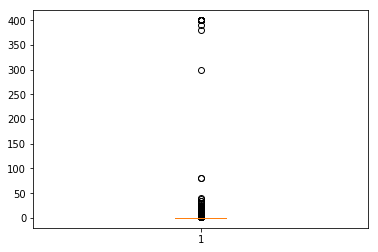

In [61]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [62]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [63]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]

In [64]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

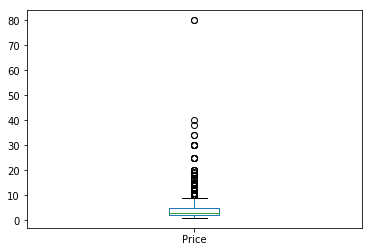

In [65]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()

In [66]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [67]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

### Histograms


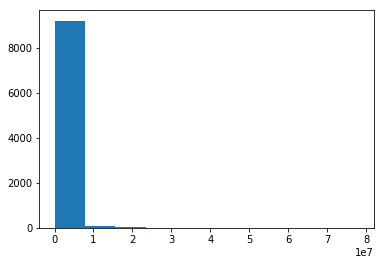

In [68]:
#Create a histogram of the Reviews
?plt.hist
plt.hist(inp1.Reviews)
plt.show()

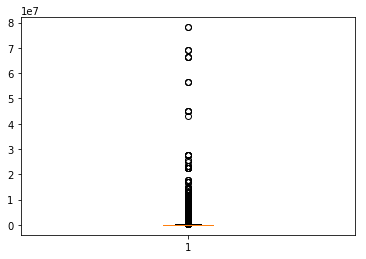

In [69]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [70]:
#Check records with 1 million reviews
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
385,Viber Messenger,COMMUNICATION,4.3,11334973,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
406,BBM - Free Calls & Messages,COMMUNICATION,4.3,12842860,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up


In [71]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

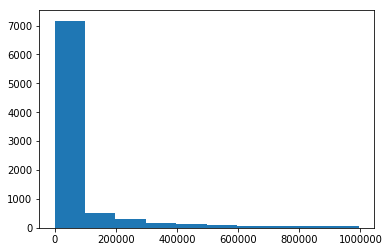

In [72]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()

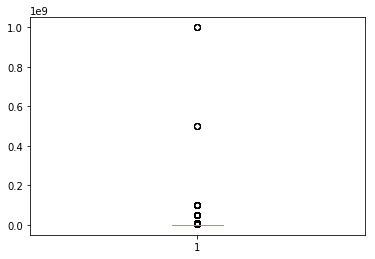

In [73]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()


In [74]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [75]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8624, 13)

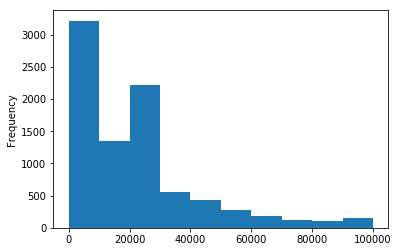

In [76]:
#Plot a histogram for Size as well.
inp1.Size.plot.hist()
plt.show()

In [77]:
inp1.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

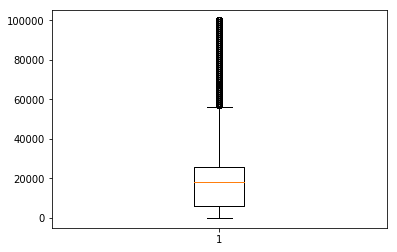

In [78]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

### Session 2 - Data Visualisation with Seaborn

In [79]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Distribution Plots

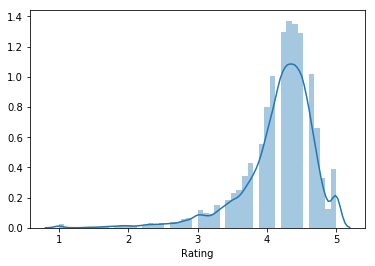

In [80]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)
plt.show()

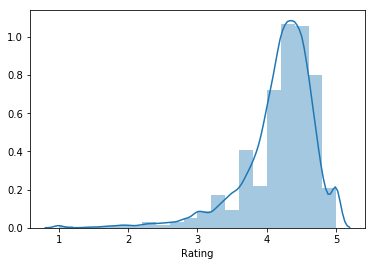

In [81]:
#Change the number of bins
sns.distplot(inp1.Rating, bins=20)
plt.show()

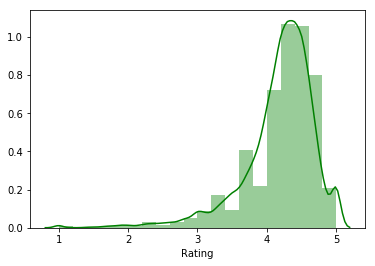

In [82]:
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins=20, color="g")
plt.show()

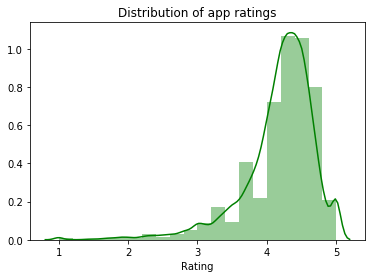

In [83]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

#### Styling Options

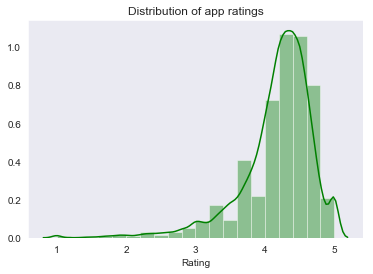

In [84]:
#Check all the styling options
?sns.set_style
sns.set_style("dark")
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

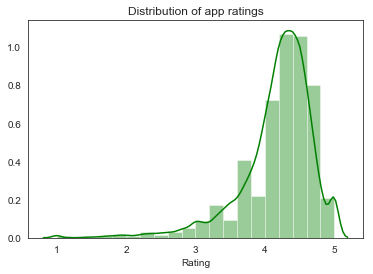

In [85]:
sns.set_style("white")
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [86]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

In [87]:
plt.style.use("tableau-colorblind10")

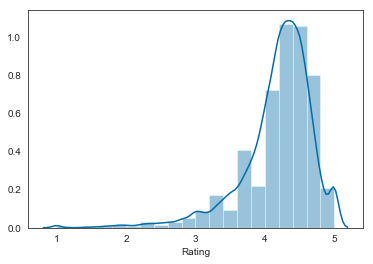

In [88]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [89]:
plt.style.use("ggplot")

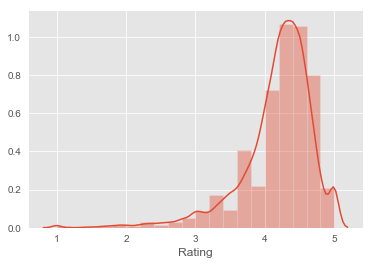

In [90]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [91]:
plt.style.use("dark_background")

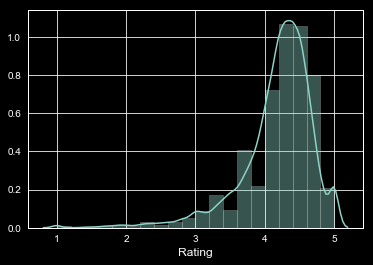

In [92]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [93]:
plt.style.use("default")
%matplotlib inline

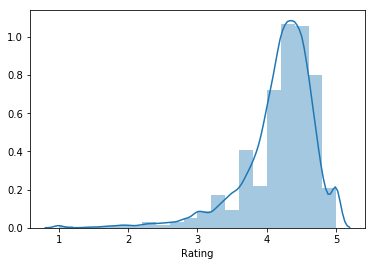

In [94]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

#### Pie-Chart and Bar Chart

In [95]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [96]:
#Remove the rows with values which are less represented 
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [97]:
inp1.shape

(8620, 13)

In [98]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)

In [99]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
App               8620 non-null object
Category          8620 non-null object
Rating            8620 non-null float64
Reviews           8620 non-null int32
Size              8620 non-null float64
Installs          8620 non-null int64
Type              8620 non-null object
Price             8620 non-null float64
Content Rating    8620 non-null object
Genres            8620 non-null object
Last Updated      8620 non-null object
Current Ver       8620 non-null object
Android Ver       8620 non-null object
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


In [100]:
#Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

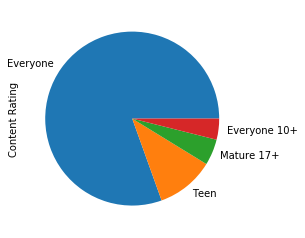

In [101]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

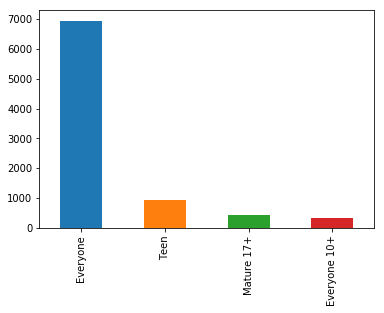

In [102]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

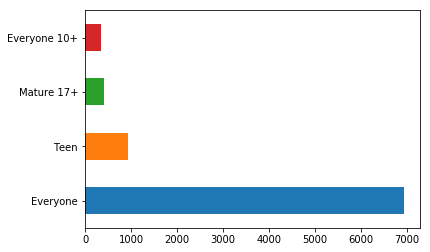

In [103]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

#### Scatter Plots

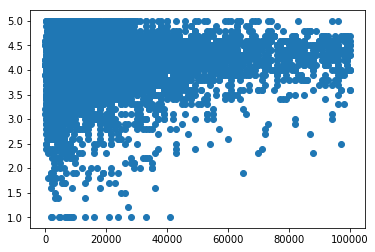

In [104]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [105]:
### Plot the same thing now using a jointplot
sns.set_style("white")

In [106]:
?sns.jointplot

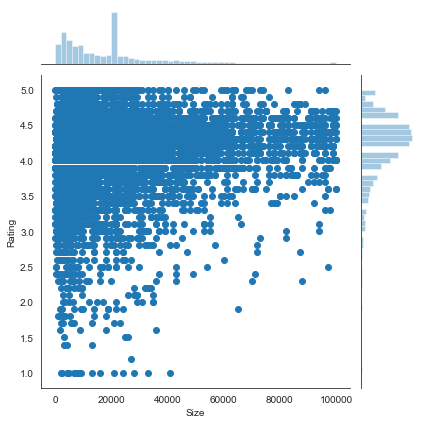

In [107]:
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()

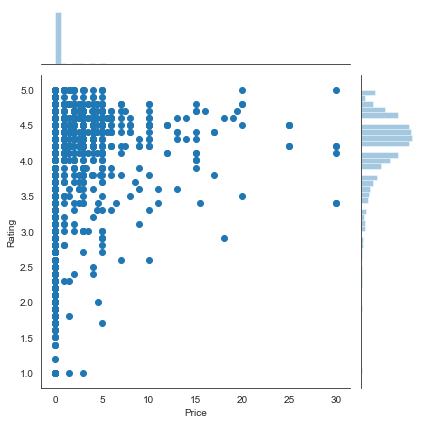

In [108]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Price, inp1.Rating)
plt.show()

**Reg Plots**

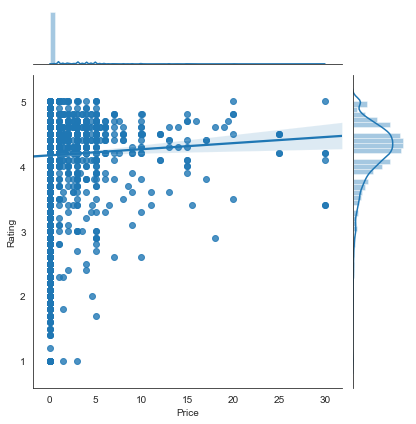

In [109]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating, kind="reg")
plt.show()

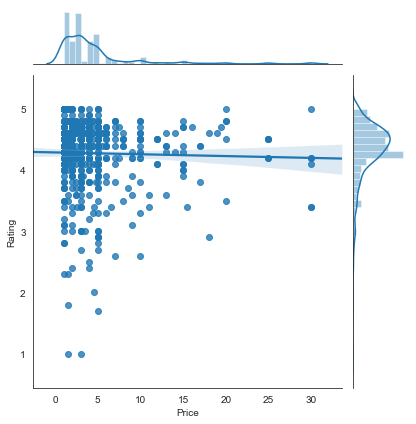

In [110]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot("Price", "Rating", data=inp1[inp1.Price>0], kind="reg")
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

In [111]:
## Create a pair plot for Reviews, Size, Price and Rating
?sns.pairplot

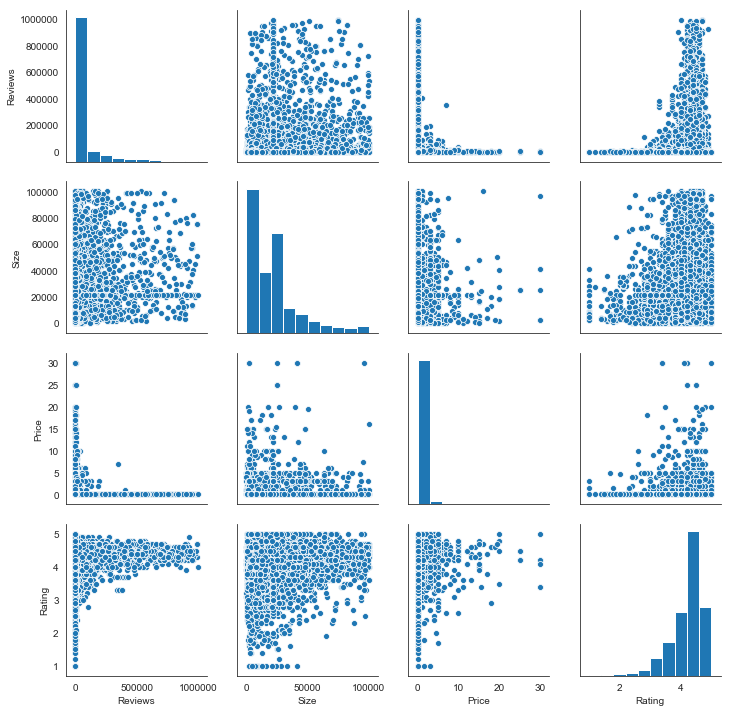

In [112]:
sns.pairplot(inp1[['Reviews', 'Size', 'Price','Rating']])
plt.show()

**Bar Charts Revisited**

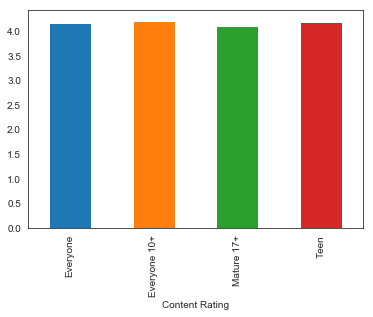

In [113]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

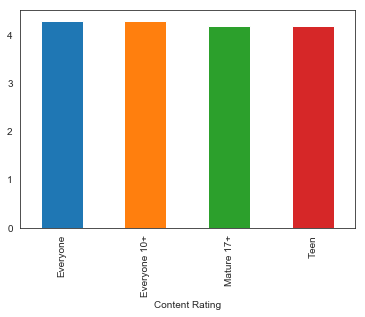

In [114]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

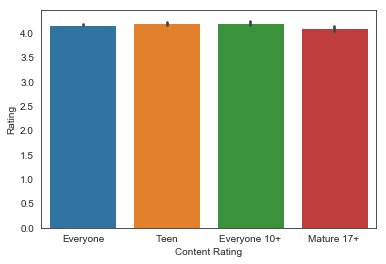

In [115]:
sns.barplot(data=inp1, x="Content Rating", y="Rating")

plt.show()

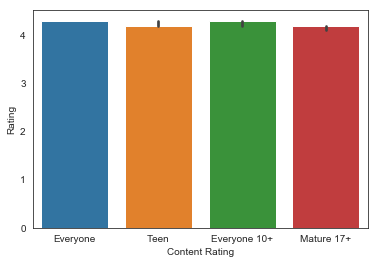

In [116]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.median)
plt.show()

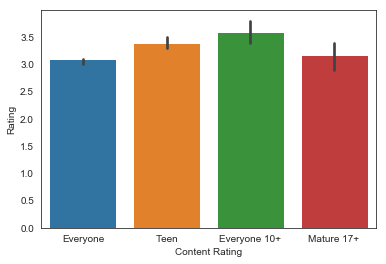

In [117]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

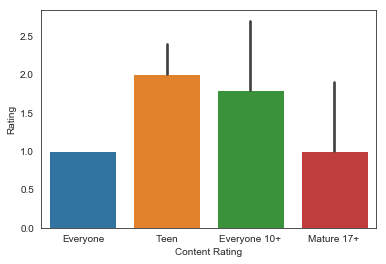

In [118]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

__Box Plots Revisited__


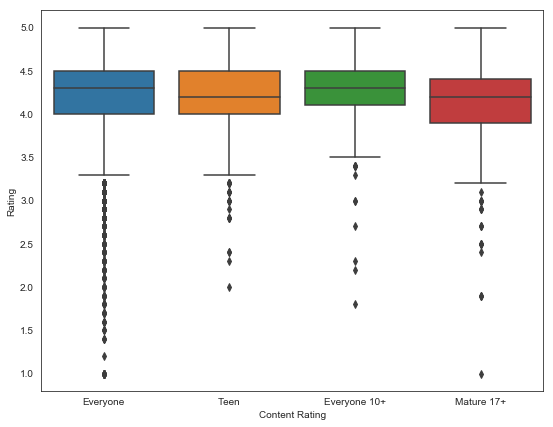

In [119]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(inp1['Content Rating'], inp1.Rating)
plt.show()

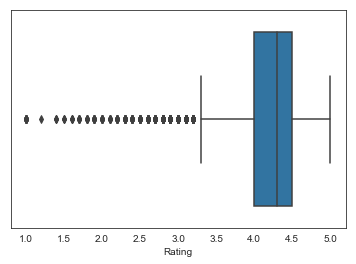

In [120]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(inp1.Rating)
plt.show()

In [121]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp1['Genres'].value_counts()

Tools                                  694
Entertainment                          508
Education                              464
Medical                                344
Finance                                315
Sports                                 310
Productivity                           310
Lifestyle                              303
Business                               298
Personalization                        295
Health & Fitness                       290
Action                                 273
Photography                            267
Communication                          249
News & Magazines                       223
Shopping                               214
Social                                 212
Travel & Local                         210
Dating                                 195
Simulation                             188
Books & Reference                      174
Arcade                                 156
Video Players & Editors                143
Casual     

In [122]:
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

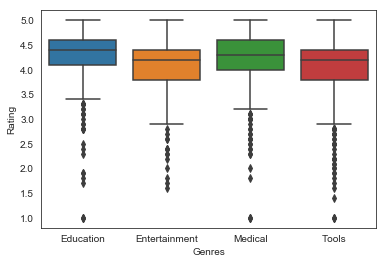

In [123]:
sns.boxplot(inp5['Genres'],inp1.Rating)

#### Heat Maps

In [124]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [125]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
inp1.head()
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [126]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [127]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [128]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

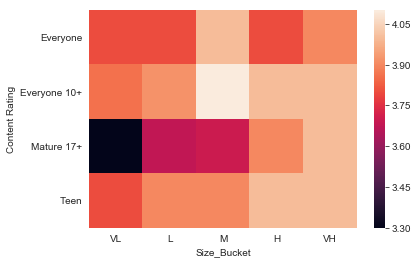

In [129]:
##Plot a heat map
sns.heatmap(res)
plt.show()

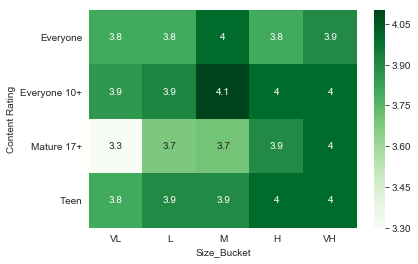

In [130]:
##Apply customisations
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

In [131]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

### Session 3: Additional Visualisations

#### Line Plots

In [132]:
## Extract the month from the Last Updated Date
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [133]:
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [134]:
## Find the average Rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

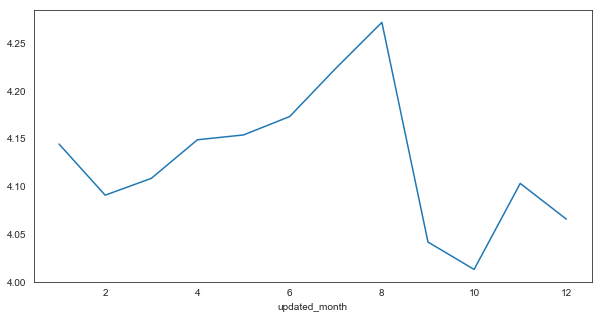

In [135]:
## Plot a line graph
plt.figure(figsize=[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [136]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


In [137]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

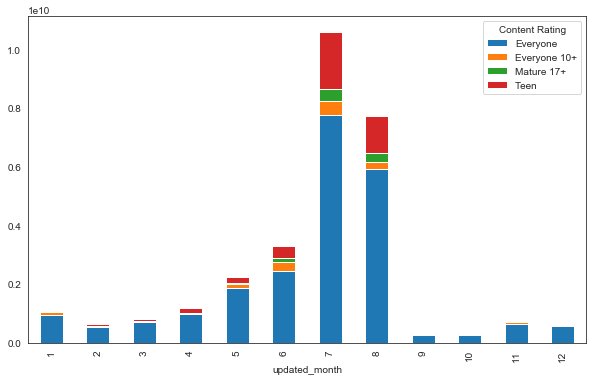

In [138]:
##Plot the stacked bar chart.
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

In [139]:
##Plot the stacked bar chart again wrt to the proportions.
monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

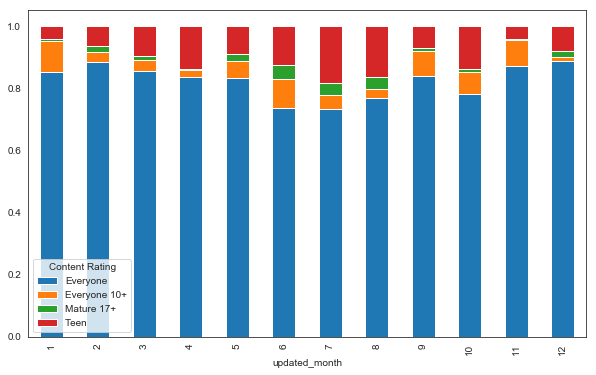

In [140]:
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()